**Data Loading**

In [117]:
import pandas as pd
import numpy as np

In [118]:
data = pd.read_csv('paddyclean.csv')
data.head()

,Hectares,Agriblock,Variety,Soil Types,Seedrate(in Kg),LP_Mainfield(in Tonnes),Nursery,Nursery area (Cents),LP_nurseryarea(in Tonnes),DAP_20days,...,Wind Direction_D1_D30,Wind Direction_D31_D60,Wind Direction_D61_D90,Wind Direction_D91_D120,Relative Humidity_D1_D30,Relative Humidity_D31_D60,Relative Humidity_D61_D90,Relative Humidity_D91_D120,Trash(in bundles),Paddy yield(in Kg)
0,6,Cuddalore,CO_43,alluvial,150,75.0,dry,120,6,240,...,SW,W,NNW,WSW,72.0,78,88,85,540,35028
1,6,Kurinjipadi,ponmani,clay,150,75.0,wet,120,6,240,...,NW,S,SE,SSE,64.6,85,84,87,600,35412
2,6,Panruti,delux ponni,alluvial,150,75.0,dry,120,6,240,...,ENE,NE,NNE,W,85.0,96,84,79,600,36300
3,6,Kallakurichi,CO_43,clay,150,75.0,wet,120,6,240,...,W,WNW,SE,S,88.5,95,81,84,540,35016
4,6,Sankarapuram,ponmani,alluvial,150,75.0,dry,120,6,240,...,SSE,W,SW,NW,72.7,91,83,81,600,34044


In [120]:
X = data.drop("Paddy yield(in Kg)", axis=1)
y = data["Paddy yield(in Kg)"]


This segment of the code involves importing the data and splitting it into X and y variables based on our response variable. our X is every column excluding the response (paddy yield) and our y is only our response (paddy yield)

**Ridge Regression**

In [121]:
alpha_values = [0.1, 1.0,10.0, 100.0]

I chose to use ridge regression due to a lack of confidence in whether some variables are relevant or not.

In [122]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Identify columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Preprocessor
preprocess = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# Pipeline
pipeline = Pipeline([
    ('preprocess', preprocess),
    ('ridge', Ridge())
])

# Grid search params MUST refer to this pipeline
param_grid = {
    'ridge__alpha': alpha_values
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X, y)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X)
print("Best alpha:", grid_search.best_params_['ridge__alpha'])
print("Best cross-validation score:", grid_search.best_score_)

Best alpha: 10.0
Best cross-validation score: 0.7778865628864732


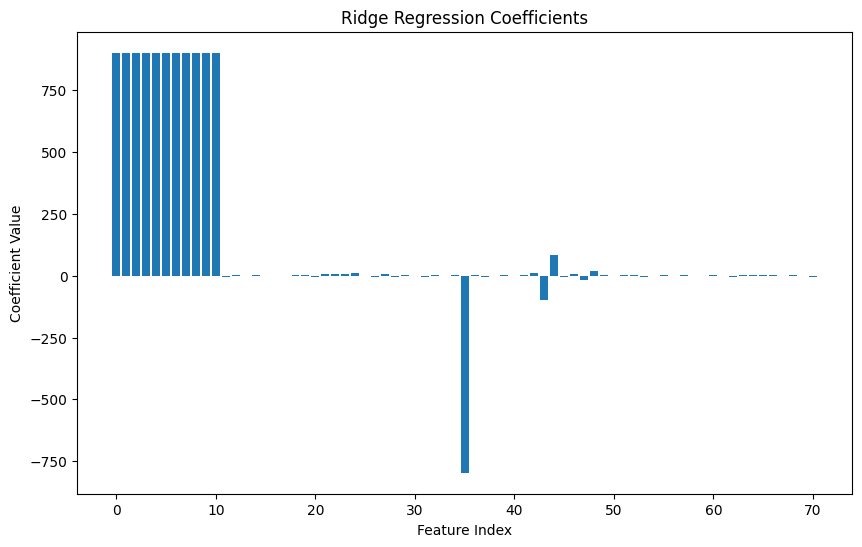

In [129]:
#visualizing coefficients
import matplotlib.pyplot as plt
coefficients = best_model.named_steps['ridge'].coef_
plt.figure(figsize=(10,6))
plt.bar(range(len(coefficients)), coefficients)
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Ridge Regression Coefficients')
plt.show()


**Support Vector Machine (support vector regression)**

Best params: {'svr__C': 100, 'svr__degree': 2, 'svr__epsilon': 1, 'svr__gamma': 'scale', 'svr__kernel': 'linear'}
Best score: 0.7679239516237079


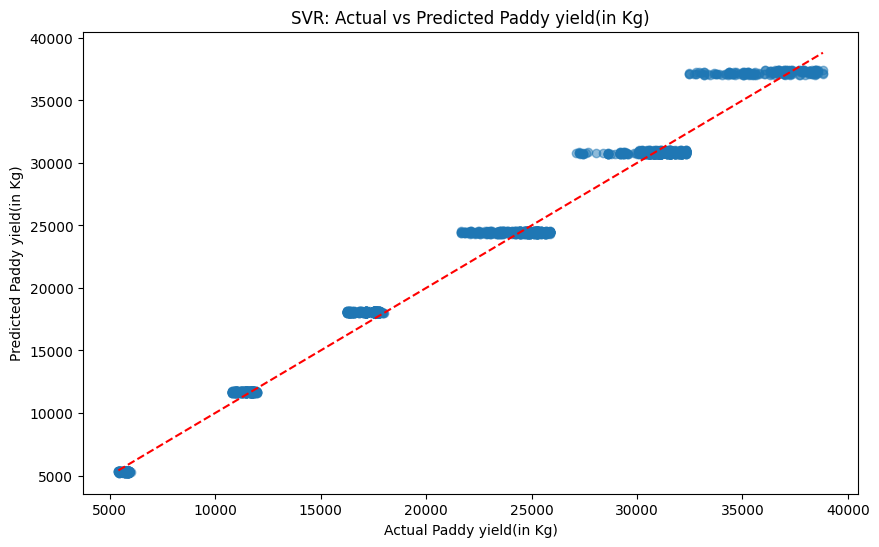

In [130]:
# SVR pipeline
from sklearn.svm import SVR
pipeline = Pipeline([
    ('preprocess', preprocess),
    ('svr', SVR())
])

# Hyperparameter grid for SVR
param_grid = {
    'svr__C': [0.1, 1, 10, 100],
    'svr__epsilon': [0.01, 0.1, 1],
    'svr__kernel': ['rbf', 'poly', 'linear'],
    # ONLY used when kernel='poly'
    'svr__degree': [2, 3, 4],
    # ONLY used for 'rbf' or 'poly'
    'svr__gamma': ['scale', 'auto']
}

# Grid Search
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    n_jobs=-1
)

grid_search.fit(X, y)

print("Best params:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

plt.figure(figsize=(10,6))
plt.scatter(y, grid_search.predict(X), alpha=0.5)
plt.xlabel('Actual Paddy yield(in Kg)')
plt.ylabel('Predicted Paddy yield(in Kg)')
plt.title('SVR: Actual vs Predicted Paddy yield(in Kg)')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()